### Etsy

In [2]:
from collections.abc import MutableMapping
import json
import csv
import os 
import pandas as pd

def _write_to_csv(csv_file, files):
    headers = ['Name', 'URL', 'SKU', 'Description', 'Category', 
               'Brand','Rating Value', 'Review Count', 'Price', 'Price Currency', 
               'Availability', 'Material', 'Review', 'Rate', 'Reviewer', 'Review Date']
    
    # Write headers to the CSV file
    for f in files:
        with open(f, 'r', encoding = 'utf-8') as file:
            f = json.load(file)
            with open(csv_file, mode='a', newline='', encoding='utf-8') as file:
                writer = csv.writer(file)
                if not os.path.exists(csv_file) or os.stat(csv_file).st_size == 0:
                    writer.writerow(headers)
                for product in f:
                    # For each product, we extract required data, handle missing values with `.get()` method
                    url = product.get('url', '')
                    name = product.get('name', '')
                    sku = product.get('sku', '')
                    description = product.get('description', '').replace('\n', ' ')
                    category = product.get('category', '')
                    
                    brand = product.get('brand', {}).get('name', '')
                    
                    rating_value = product.get('aggregateRating', {}).get('ratingValue', '')
                    total_review_count = product.get('aggregateRating', {}).get('reviewCount', '')

                    price = product.get('offers', {}).get('price', '')
                    price_currency = product.get('offers', {}).get('priceCurrency', '')
                    availability = product.get('offers', {}).get('availability', '')
                    
                    material = product.get('material', '')
                    
                    # Handling the first review data
                    if 'review' in product and len(product['review']) > 0:
                        for item in product['review']:
                            review = item.get('reviewBody', '')
                            rate = item.get('reviewRating', {}).get('ratingValue', '') 
                            reviewer = item.get('author', {}).get('name', '') 
                            review_date = item.get('datePublished', '')
                            writer.writerow([name, url, sku, description, category, 
                            brand, rating_value, total_review_count, price, price_currency, 
                            availability, material, review, rate, reviewer, review_date])
                    else:
                        review = rate = reviewer = review_date = ''
                        writer.writerow([name, url, sku, description, category, 
                        brand, rating_value, total_review_count, price, price_currency, 
                        availability, material, review, rate, reviewer, review_date])
                    
                    # Write the row for each product


    print(f'Data has been successfully written to {csv_file}')

%pwd

'c:\\Users\\tianc\\scrapfly-scrapers\\etsy-scraper\\results'

In [3]:
%cd ~/scrapfly-scrapers/etsy-scraper/results/

# csv_file = 'etsy_reviews_.csv'

# files = ['products_null.json']
# _write_to_csv(csv_file, files)


C:\Users\tianc\scrapfly-scrapers\etsy-scraper\results


In [30]:
file = pd.read_excel('etsy_reviews_w_sentiment.xlsx')
file.head()
# file = file.drop_duplicates(subset = ['name', 'title','text']).reset_index(drop = True)
# file.to_csv('etsy_reviews_w_sentiment.csv', index = False)
# file.to_excel('etsy_reviews_w_sentiment.xlsx', index = False)

,Name,URL,SKU,Description,Category,Brand,Rating Value,Review Count,Price,Price Currency,...,Review,Rate,Reviewer,Review Date,neg,neu,pos,compound,sentiment,pred
0,Herbal Sleep Tea | Relaxation Tea | Loose Leaf...,https://www.etsy.com/listing/1460562572/herbal...,1460562572,Are you having trouble falling asleep? Do you ...,Home & Living < Food & Drink < Coffee & Tea < Tea,SwedeeBird,4.7,28.0,19.95,USD,...,One of my favorite teas from the collection Se...,5.0,jennsok2177,2023-09-05,0.035,0.550,0.415,0.9563,positive,positive
1,"Passion Flower Leaf Organic Dried Cut, Passifl...",https://www.etsy.com/listing/1502837456/passio...,1502837456,🜃 Type: Organic Passion flower Herb 🜃 Process:...,"Home & Living < Food & Drink < Herbs, Spices &...",ShopEarthFolk,4.8,3441.0,NaN,USD,...,First time ordering from this company good qua...,5.0,Jan Amsler,2024-06-13,0.000,0.588,0.412,0.7906,positive,positive
2,"Organic Valerian Root, 1lb C/S | Tea | Valeria...",https://www.etsy.com/listing/953560672/organic...,953560672,Type: Organic Valerian Root. Color: Brown. Pr...,"Home & Living < Food & Drink < Herbs, Spices &...",ShellyKongoHerbs,4.7,7747.0,NaN,USD,...,It works great will buy again,5.0,Gayle,2024-09-10,0.000,1.000,0.000,0.0000,neutral,positive
3,"Organic Valerian Root, 1lb C/S | Tea | Valeria...",https://www.etsy.com/listing/953560672/organic...,953560672,Type: Organic Valerian Root. Color: Brown. Pr...,"Home & Living < Food & Drink < Herbs, Spices &...",ShellyKongoHerbs,4.7,7747.0,NaN,USD,...,It works great will buy again,4.0,Gayle,2024-09-10,0.000,1.000,0.000,0.0000,neutral,positive
4,"Organic Valerian Root, 1lb C/S | Tea | Valeria...",https://www.etsy.com/listing/953560672/organic...,953560672,Type: Organic Valerian Root. Color: Brown. Pr...,"Home & Living < Food & Drink < Herbs, Spices &...",ShellyKongoHerbs,4.7,7747.0,NaN,USD,...,Awesome stuff great for sleeping tea Super sto...,5.0,Christopher,2024-07-09,0.000,0.366,0.634,0.9201,positive,positive


In [26]:
temp = file.groupby('Name').agg({'Brand':'first', 'Rating Value':'mean', 'Review Count':'first'}).reset_index()
temp = temp.groupby('Brand').agg({'Rating Value':'mean', 'Review Count':'sum'}).sort_values(by = 'Rating Value', ascending = False).head(10).reset_index()

In [33]:
ratings = []
sent = []
for b in temp.Brand:
    ct = file[file.Brand == b].groupby('Name').agg({'Rating Value': 'first'}).reset_index()['Rating Value'].value_counts().reset_index()
    ratings.append(ct.to_dict('records'))
    s = file[file.Brand == b].sentiment.value_counts()/file[file.Brand == b].shape[0]
    sent.append(s.reset_index().to_dict('records'))

temp['ratings'] = ratings
temp['sent_breakdown'] = sent

##### sent with vader

In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
file = file.dropna(subset = 'Review').drop_duplicates().reset_index(drop = True)

analyzer = SentimentIntensityAnalyzer()
vs = [analyzer.polarity_scores(sentence) for sentence in file['Review']]

file[list(vs[0].keys())] = [[v[k] for k in vs[0].keys()] for v in vs]
file['sentiment'] = file.compound.apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

file.to_csv('etsy_reviews_w_sentiment.csv', index = False)
file.to_excel('etsy_reviews_w_sentiment.xlsx', index = False)

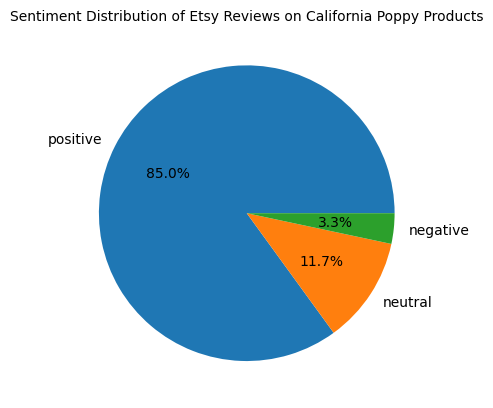

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

file.pred.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax,)
ax.set_ylabel('')
ax.set_title('Sentiment Distribution of Etsy Reviews on California Poppy Products', size = 10)
fig.savefig('sentiment_distribution_etsy_transformer.png', dpi = 300)

### TrustPilot

In [1]:
from collections.abc import MutableMapping
import json
import csv
import os 
import pandas as pd

def _write_to_csv(csv_file, files):
    headers = ['Company', 'Website', 'Id', 'Source',
               'Trust Score (if from TrustPilot)', 'Review Count', 'Review Source','Title', 'Rate', 'Review', 'Likes', 'Reply', 'Reviewer', 'Review Date', 'Total Reviews by Reviewer', 
               'Language', 'Country Code']
    
    # Write headers to the CSV file
    for i in range(0, len(files), 2):
        company = files[i]
        reviews = files[i+1]
        with open(company, 'r', encoding = 'utf-8') as f1, open(reviews, 'r', encoding = 'utf-8') as f2:    
            company = json.load(f1)[0]
            reviews = json.load(f2)
            with open(csv_file, mode='a', newline='', encoding='utf-8') as file:
                writer = csv.writer(file)
                if not os.path.exists(csv_file) or os.stat(csv_file).st_size == 0:
                    writer.writerow(headers)
                Company =  company.get('companyDetails', {}).get('displayName', '')
                Website = company.get('companyDetails', {}).get('websiteUrl', '')
                Id = company.get('companyDetails', {}).get('id', '')
                Source = company.get('pageUrl', '')
                Trust_Score = company.get('companyDetails', {}).get('trustScore', '')
                Review_Count = company.get('companyDetails', {}).get('numberOfReviews', '')
                for r in reviews:
                    ReviewSource = r.get('labels', {}).get('verification', {}).get('reviewSourceName', '')
                    Title = r.get('title', '')
                    Rate = r.get('rating', '')
                    Review = r.get('text', '')
                    Likes = r.get('likes', '')
                    Reply = r.get('reply', '')
                    Reviewer = r.get('consumer', {}).get('displayName', '') or r.get('consumer', {}).get('id', '')
                    ReviewDate = r.get('dates', {}).get('publishedDate', '')
                    TotalReviewsbyReviewer = r.get('consumer', {}).get('numberOfReviews', '')
                    Language = r.get('language', '')   
                    CountryCode = r.get('consumer', {}).get('countryCode', '') 
                    writer.writerow([Company, Website, Id, Source, Trust_Score, Review_Count, ReviewSource, 
                                            Title, Rate, Review, Likes, Reply, Reviewer, ReviewDate, TotalReviewsbyReviewer, 
                                            Language, CountryCode])
                    
    print(f'Data has been successfully written to {csv_file}')


In [4]:
%cd  ~/scrapfly-scrapers/trustpilot-scraper/results/

csv_file = 'trustpilot_reviews.csv'
files = ['companies.json','reviews.json',
        'companies_0.json', 'reviews_0.json']


_write_to_csv(csv_file, files)

C:\Users\tianc\scrapfly-scrapers\trustpilot-scraper\results
Data has been successfully written to trustpilot_reviews.csv


In [5]:
file = pd.read_csv('trustpilot_reviews_.csv')
file.head()
# file = file.dropna(subset = 'Review')
# file.to_excel('trustpilot_reviews.xlsx')


,Company,Website,Id,Source,Trust Score (if from TrustPilot),Review Count,Review Source,Title,Rate,Review,Likes,Reply,Reviewer,Review Date,Total Reviews by Reviewer,Language,Country Code
0,Foster Farms,http://fosterfarms.com,64332c1c26e69b18a5e193bb,https://www.trustpilot.com/review/fosterfarms.com,3.7,2,Organic,I love your Foster Farms Jalapeno Cheese Corn ...,5,"So cheesy, and so spicy! They make your mouth ...",0,NaN,Alec Heesacker,2024-04-05T23:55:51.000Z,48,en,US
1,Foster Farms,http://fosterfarms.com,64332c1c26e69b18a5e193bb,https://www.trustpilot.com/review/fosterfarms.com,3.7,2,Organic,Great chicken breasts,2,"Great chicken breasts, great product created b...",0,NaN,Malvina,2023-04-09T23:30:04.000Z,7,en,US
2,Mountain Rose Herbs,http://www.mountainroseherbs.com,56e33ba20000ff00058a1440,https://www.trustpilot.com/review/www.mountain...,4.8,11085,BigCommerce,Top quality,5,"Top quality, good service, accurate orders",0,NaN,customer,2024-09-26T17:11:53.000Z,4,en,US
3,Mountain Rose Herbs,http://www.mountainroseherbs.com,56e33ba20000ff00058a1440,https://www.trustpilot.com/review/www.mountain...,4.8,11085,BigCommerce,Great Products Everytime!,5,I'm never disappointed with what I received fr...,0,NaN,Star,2024-09-26T16:10:16.000Z,1,en,US
4,Mountain Rose Herbs,http://www.mountainroseherbs.com,56e33ba20000ff00058a1440,https://www.trustpilot.com/review/www.mountain...,4.8,11085,BigCommerce,It takes too long to ship my order,3,It takes too long to ship my order! several d...,0,NaN,JILL BRASHEAR,2024-09-26T02:41:40.000Z,3,en,US


In [16]:
url = 'https://www.amazon.com/Pacific-Herbs-Menopause-Relief-Herb/product-reviews/B00CXXTIVE/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'
ASIN = url.split("/product-reviews/")[1].split("/")[0]
url.split(f'{ASIN}')

['https://www.amazon.com/Pacific-Herbs-Menopause-Relief-Herb/product-reviews/',
 '/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews']

In [ ]:
total_pages = 10
_reviews_per_page = 20
for page in range(2, total_pages + 1):
    url = f"https://www.amazon.com/Pacific-Herbs-Menopause-Relief-Herb/product-reviews/{ASIN}/ref=cm_cr_getr_d_paging_btm_next_{page}?pageNumber={page}&pageSize={_reviews_per_page}"
    print(url)

### Amazon

In [1]:
from collections.abc import MutableMapping
import json
import csv
import os
import pandas as pd

def _write_to_csv(csv_file, files):
    # Updated headers to match the data order
    # headers = [
    #     'asin', 'brand', 'name', 'description', 'features', 'stars', 
    #     'rating_count', 'review_title', 'review_rating', 
    #     'review_location_and_date', 'verified', 'review_body', 'images'
    # ]
    headers = [
        'asin', 'name', 'brand', 'description', 'features',
        'stars', 'rating_count', 
        'info_table','ingredients'
    ]

    # Write headers to the CSV file
    for f in files:
        with open(f, 'r', encoding='utf-8') as file:
            f = json.load(file)
            with open(csv_file, mode='a', newline='', encoding='utf-8') as file:
                writer = csv.writer(file)
                
                # Write headers only if the file is empty
                if not os.path.exists(csv_file) or os.stat(csv_file).st_size == 0:
                    writer.writerow(headers)

                for product in f:
                    asin = product.get('asin', '')
                    brand = product.get('brand', '')
                    name = product.get('name', '')
                    description = product.get('description', '')
                    features = ' | '.join(product.get('features', []))  # Join features into a single string
                    stars = product.get('stars', '')  # Extract stars
                    rating_count = product.get('rating_count', '')  # Extract rating count
                    
                    # # Handling the review information
                    # review_title = product.get('title', '')
                    # review_rating = product.get('rating', '')
                    # review_date = product.get('location_and_date', '')
                    # verified = product.get('verified', '')
                    # review_text = product.get('text', '')

                    # extract ingredients for quality analysis
                    ingredients = product.get('ingredients', '') 
                    
                    # Join image URLs into a single string
                    # images = ' | '.join(product.get('images', []))

                    # Write row to CSV, with order matching the headers|
                    writer.writerow([asin, name, brand, description, features, stars, 
                                     rating_count, ingredients]) 
                                    #  review_title, review_rating,
                                    #  review_date, verified, review_text, images])
                    # writer.writerow([asin, name, ingredients])

    print(f'Data has been successfully written to {csv_file}')


In [2]:
%cd  ~/scrapfly-scrapers/amazon-scraper/results/

# csv_file = 'Amazon_reviews_california_poppy_products_only.csv'

# files = ['search_california_poppy_tea_products_only.json', 
#          'search_california_poppy_tincture_products_only.json',
#          'search_california_poppy_drink_products_only.json',
#          'search_california_poppy_supplement_products_only.json']
# _write_to_csv(csv_file, files)


C:\Users\tianc\scrapfly-scrapers\amazon-scraper\results


In [3]:
file = pd.read_csv('Amazon_reviews_california_poppy_products_only.csv')
reviews = pd.read_excel('Amazon_reviews_w_sentiment.xlsx', index_col=0)
# file.drop_duplicates(subset = ['asin'], inplace=True)
# file.to_csv('Amazon_reviews_california_poppy_products_only.csv', index = False)
# file = file[file.brand == 'Pacific Herbs']
# file.to_excel('Amazon_reviews.xlsx', index_label='asin')

In [4]:
file.brand = file.brand.apply(lambda x: x.split('Store')[0].split('Visit the')[-1].strip() if x.startswith('Visit the') else x.split(':')[-1].strip() if x.startswith('Brand') else x)
comb = file.merge(reviews.reset_index(), on = 'asin', how = 'inner')
comb['brand'] = comb.brand_x
comb.stars_x = comb.stars_x.apply(lambda x: float(x.split(' out of')[0]))
comb.rating_count_x = comb.rating_count_x.apply(lambda x: int(x.split(' global')[0].replace(',','')))
comb.drop(columns = ['brand_x','brand_y', 'stars_y', 'rating_count_y'], inplace = True)

In [36]:
temp = comb.groupby('asin').agg({'brand':'first', 'stars_x':'first', 'rating_count_x':'first'}).reset_index()
temp = temp.groupby('brand').agg({'stars_x':'mean', 'rating_count_x':'sum'}).sort_values('stars_x', ascending = False).reset_index()
temp.head(10)

,brand,stars_x,rating_count_x
0,EnjoyGevity,5.00,4
1,Akshit,4.80,10
2,Alivio Vital,4.70,35
3,Yogi,4.70,61206
4,Rishi Tea,4.70,1114
5,Standard Process Inc.,4.65,2509
6,Eelicious,4.60,48
7,Buddha Teas,4.60,5873
8,The Republic of Tea,4.60,2229
9,Tiesta Tea,4.60,26690


In [22]:
ratings = []
sent = []
for b in temp.brand:
    ct = comb[comb.brand == b].groupby('asin').agg({'stars_x': 'first'}).reset_index().stars_x.value_counts().reset_index()
    ratings.append(ct.to_dict('records'))
    s = round(comb[comb.brand == b].sentiment.value_counts()/comb[comb.brand == b].shape[0], 2)
    sent.append(s.reset_index().to_dict('records'))

temp['ratings'] = ratings
temp['sent_breakdown'] = sent

for i in range(10):
    print(temp.sent_breakdown[i])  

[{'sentiment': 'positive', 'count': 1.0}]
[{'sentiment': 'positive', 'count': 1.0}]
[{'sentiment': 'positive', 'count': 1.0}]
[{'sentiment': 'positive', 'count': 1.0}]
[{'sentiment': 'positive', 'count': 1.0}]
[{'sentiment': 'positive', 'count': 0.8}, {'sentiment': 'neutral', 'count': 0.1}, {'sentiment': 'negative', 'count': 0.1}]
[{'sentiment': 'positive', 'count': 1.0}]
[{'sentiment': 'positive', 'count': 0.77}, {'sentiment': 'neutral', 'count': 0.17}, {'sentiment': 'negative', 'count': 0.07}]
[{'sentiment': 'positive', 'count': 0.95}, {'sentiment': 'neutral', 'count': 0.05}]
[{'sentiment': 'positive', 'count': 0.95}, {'sentiment': 'negative', 'count': 0.05}]


#### <font color = '#8900e9'> **match USLD** </font>

In [5]:
usld = pd.read_csv('~/scrapfly-scrapers/iherb-scraper/results/california_poppy_usld.csv')

for col in usld.columns:
    usld[col] = usld[col].apply(lambda x: x.strip("[]"))
    usld[col] = usld[col].apply(lambda x: x.replace("'", ""))

col = ['netContents', 'claims', 'allIngredients']
def strip_all(x):
    return x.strip(" {} ")

def str2dict(x):
    try:
        sub_entries = x.strip(' {} ').split('},')
        parsed_list = []
        for sub in sub_entries:
            sub_dict = {}
            for pair in sub.split(','):
                try:
                    key, value = map(strip_all, pair.split(':', 1))  # only split the first colon
                    sub_dict[key] = value
                except ValueError:
                    pass  
            parsed_list.append(sub_dict)
        return parsed_list
    except AttributeError:
        return []
    
for c in col:
    usld[c] = usld[c].apply(str2dict)

usld.to_csv('california_poppy_usld_cleaned.csv', index = False)

In [6]:
brands = usld[usld.offMarket == '0'].brandName.unique()
brands = '|'.join(brands)

comb_v = comb[comb.brand.str.contains(brands)]
temp = comb_v.groupby('asin').agg({'brand':'first', 'stars_x':'first', 'rating_count_x':'first'}).reset_index()
temp = temp.groupby('brand').agg({'stars_x':'mean', 'rating_count_x':'sum'}).sort_values('stars_x', ascending = False).reset_index()
temp.head(10)

,brand,stars_x,rating_count_x
0,Gaia Herbs,4.500000,3538
1,Traditional Medicinals,4.400000,14041
2,Herb Pharm,4.344444,11299
3,Herbs Etc.,4.300000,143
4,Bio Nutrition,4.166667,477
5,Hawaii Pharm,3.975000,1165
6,Cedar Bear Naturales,3.900000,9
7,Herbalist & Alchemist,3.800000,12


In [11]:
ratings = []
sent = []
for b in temp.head(10).brand.to_list():
    ct = comb[comb.brand == b].groupby('asin').agg({'stars_x': 'first'}).reset_index().stars_x.value_counts().reset_index()
    ratings.append(ct.to_dict('records'))
    s = round(comb[comb.brand == b].sentiment.value_counts()/comb[comb.brand == b].shape[0], 2)
    sent.append(s.reset_index().to_dict('records'))

temp['ratings'] = ratings
temp['sent_breakdown'] = sent

for i in range(len(temp)):
    print(temp.ratings[i])
    print(temp.sent_breakdown[i])  

[{'stars_x': 4.5, 'count': 2}, {'stars_x': 4.7, 'count': 1}, {'stars_x': 4.2, 'count': 1}, {'stars_x': 4.6, 'count': 1}]
[{'sentiment': 'positive', 'count': 0.82}, {'sentiment': 'negative', 'count': 0.1}, {'sentiment': 'neutral', 'count': 0.08}]
[{'stars_x': 4.4, 'count': 1}]
[{'sentiment': 'positive', 'count': 1.0}]
[{'stars_x': 4.5, 'count': 4}, {'stars_x': 4.3, 'count': 2}, {'stars_x': 4.4, 'count': 1}, {'stars_x': 4.1, 'count': 1}, {'stars_x': 4.0, 'count': 1}]
[{'sentiment': 'positive', 'count': 0.79}, {'sentiment': 'negative', 'count': 0.17}, {'sentiment': 'neutral', 'count': 0.04}]
[{'stars_x': 4.3, 'count': 1}]
[{'sentiment': 'positive', 'count': 1.0}]
[{'stars_x': 4.1, 'count': 1}, {'stars_x': 4.0, 'count': 1}, {'stars_x': 4.4, 'count': 1}]
[{'sentiment': 'positive', 'count': 0.48}, {'sentiment': 'negative', 'count': 0.35}, {'sentiment': 'neutral', 'count': 0.16}]
[{'stars_x': 3.6, 'count': 3}, {'stars_x': 3.4, 'count': 2}, {'stars_x': 4.3, 'count': 2}, {'stars_x': 4.2, 'count

In [70]:
brand = temp.head(10).brand.to_list()
for b in brand:
    print(b)
    display(usld[(usld.offMarket == '0') & (usld.brandName.apply(lambda x: x.strip() in b.strip())) & (usld.fullName.str.contains('California Poppy'))].head(2))

Gaia Herbs


,_id,fullName,brandName,langualCode,langualCodeDescription,allIngredients,netContents,claims,offMarket
33,209487,California Poppy,Gaia Herbs,"E0165, A1306","Liquid, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'fl. Oz.', 'quantity': '4', 'display...","[{'langualCodeDescription': 'All Other', 'lang...",0
34,209511,California Poppy,Gaia Herbs,"E0165, A1306","Liquid, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'fl. Oz.', 'quantity': '1', 'display...","[{'langualCodeDescription': 'All Other', 'lang...",0


Traditional Medicinals


,_id,fullName,brandName,langualCode,langualCodeDescription,allIngredients,netContents,claims,offMarket


Herb Pharm


,_id,fullName,brandName,langualCode,langualCodeDescription,allIngredients,netContents,claims,offMarket
3,203399,California Poppy,Herb Pharm,"E0165, A1306","Liquid, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'fl. Oz.', 'quantity': '4', 'display...","[{'langualCodeDescription': 'All Other', 'lang...",0
4,203940,California Poppy,Herb Pharm,"E0165, A1306","Liquid, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'fl. Oz.', 'quantity': '1', 'display...","[{'langualCodeDescription': 'All Other', 'lang...",0


Herbs Etc.


,_id,fullName,brandName,langualCode,langualCodeDescription,allIngredients,netContents,claims,offMarket
17,50195,California Poppy,Herbs Etc.,"E0165, A1306","Liquid, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'Fluid Ounce(s)', 'quantity': '8', '...","[{'langualCodeDescription': 'No Claim', 'langu...",0


Bio Nutrition


,_id,fullName,brandName,langualCode,langualCodeDescription,allIngredients,netContents,claims,offMarket
2,200561,California Poppy Seed,Bio Nutrition,"E0159, A1306","Capsule, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'Vegetarian Capsule(s)', 'quantity':...","[{'langualCodeDescription': 'All Other', 'lang...",0


Hawaii Pharm


,_id,fullName,brandName,langualCode,langualCodeDescription,allIngredients,netContents,claims,offMarket
25,237306,California Poppy,Hawaii Pharm,"E0165, A1306","Liquid, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'Fluid Ounce(s)', 'quantity': '4', '...","[{'langualCodeDescription': 'All Other', 'lang...",0
35,237946,California Poppy,Hawaii Pharm,"E0165, A1306","Liquid, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'Fluid Ounce(s)', 'quantity': '4', '...","[{'langualCodeDescription': 'All Other', 'lang...",0


Cedar Bear Naturales


,_id,fullName,brandName,langualCode,langualCodeDescription,allIngredients,netContents,claims,offMarket
45,237002,California Poppy Flower,Cedar Bear,"E0165, A1306","Liquid, Botanical",[{'ingredientGroup': 'Proprietary Blend (Herb/...,"[{'unit': 'mL', 'quantity': '60', 'display': '...","[{'langualCodeDescription': 'All Other', 'lang...",0
47,236991,California Poppy Flower,Cedar Bear,"E0165, A1306","Liquid, Botanical",[{'ingredientGroup': 'Proprietary Blend (Herb/...,"[{'unit': 'mL', 'quantity': '30', 'display': '...","[{'langualCodeDescription': 'All Other', 'lang...",0


Herbalist & Alchemist


,_id,fullName,brandName,langualCode,langualCodeDescription,allIngredients,netContents,claims,offMarket
24,173913,California Poppy,Herbalist & Alchemist,"E0165, A1306","Liquid, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'fl. Oz.', 'quantity': '2', 'display...","[{'langualCodeDescription': 'All Other', 'lang...",0


#### sent with vader

In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
file = file.dropna(subset = 'review_body').drop_duplicates().reset_index(drop = True)

analyzer = SentimentIntensityAnalyzer()
vs = [analyzer.polarity_scores(sentence) for sentence in file['review_body']]

file[list(vs[0].keys())] = [[v[k] for k in vs[0].keys()] for v in vs]
file['sentiment'] = file.compound.apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

file.to_csv('Amazon_reviews_w_sentiment.csv', index=False, header=False)
# file.to_excel('Amazon_reviews_w_sentiment.xlsx', index = False)

In [3]:
file = pd.read_csv('Amazon_reviews_w_sentiment.csv')
file = file.drop_duplicates().reset_index(drop = True)
file.to_csv('Amazon_reviews_w_sentiment.csv', index = False)
file.to_excel('Amazon_reviews_w_sentiment.xlsx', index = False)

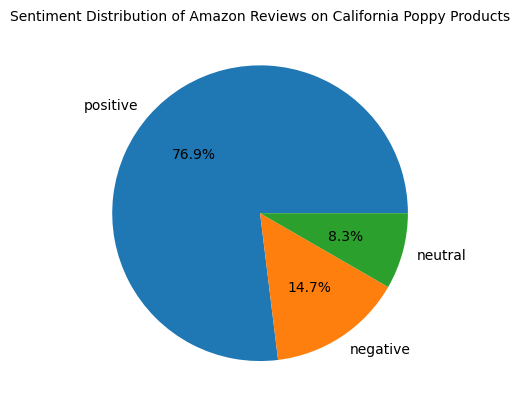

In [40]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

file.sentiment.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax,)
ax.set_ylabel('')
ax.set_title('Sentiment Distribution of Amazon Reviews on California Poppy Products', size = 10)
fig.savefig('sentiment_distribution_Amazon_vader.png', dpi = 300)

#### sent w/ Transformers

In [3]:
from transformers import AutoTokenizer
from transformers import RobertaTokenizer
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
from transformers import AutoModelForSequenceClassification
from datasets import Dataset, load_dataset
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from tqdm import tqdm
import evaluate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import text_cleaning
import random
import pandas as pd
from collections import Counter
import pickle
import joblib
import csv
import json
from copy import deepcopy 
import warnings
import sklearn.exceptions
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

violet = '#702b9d'
RANDOM_SEED = 3001
batch_size = 8
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def tokenize_function(examples):
    tok = tokenizer(examples["text"], padding='max_length', truncation=True, 
                    max_length = 512,
                    return_tensors="pt")
    examples['text'] = tok['input_ids']
    return examples 

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

In [4]:
%cd ../../amazon-scraper/

/scratch/tl2546/scrapfly-scrapers/amazon-scraper


In [5]:
## preprocess, tokenize, loader
amazon_reviews = Dataset.from_csv('results/Amazon_reviews_w_sentiment.csv')

amazon_reviews_ = amazon_reviews.map(lambda x: text_cleaning.text_cleaning(x, map_label = False))
amazon_reviews_ = amazon_reviews_.map(tokenize_function, batched = True, load_from_cache_file = False)
amazon_reviews_.set_format('torch')

Map:   0%|          | 0/1839 [00:00<?, ? examples/s]

In [14]:
def do_infer(infer_data, output_dir):

    model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")      
    model.to(device)
    model.eval()
    
    headers = list(amazon_reviews_.features)[:-1] + ['pred']
    
    output_file = output_dir + '/preds.csv'    
    with torch.no_grad():
        with open(output_file, mode='a', newline='', encoding='utf-8') as file:
                writer = csv.writer(file)
                writer.writerow(headers)
                for i in tqdm(range(0, len(infer_data), batch_size)):
                    batch = infer_data[i:i + batch_size]
                    input = torch.tensor(batch["text"]).to(device)
                    
                    outputs = model(input)
                    logits = outputs.logits
                    predictions = torch.argmax(logits, dim=-1)
                    
                    for j in range(predictions.shape[0]):
                        row = [batch[h][j] for h in headers[:-1]] + [['negative', 'neutral', 'positive'][predictions[j].item()]]
                        writer.writerow(row)
    print('inference completed ...')
    return 

In [15]:
do_infer(amazon_reviews_, os.getcwd())

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 230/230 [00:18<00:00, 12.29it/s]

inference completed ...


##### effective within 24 hrs

In [4]:
import re
effectiveness_pattern = r'\b(?:immediat\w*|fast\w*|\b\w*hour\w*\b|same day|instant\w*|overnight|rapid\w*|quick\w*|prompt\w*|within\w*\s+\d+\s*hour\w*|same\s+night|one\s+day|short\w*\s+time|quick\s+relief|in\s+no\s+time|in\s+a\s+few\s+hours|next\s+day|first\s+use|immediat\w+\s+result\w*|effective\s+right\s+away|almost\s+instantly)\b'

def extract_effectiveness_keywords(text):
    if pd.isna(text):
        return []
    return re.findall(effectiveness_pattern, text, flags=re.IGNORECASE)


file['effectiveness_keywords_in_review'] = (file.review_title.apply(extract_effectiveness_keywords) +
                                             file.review_body.apply(extract_effectiveness_keywords))
file['effectiveness_mentioned'] = file.effectiveness_keywords_in_review.apply(lambda x: len(x) > 0)

In [ ]:
import plotly.express as px

file_w_effect = file.groupby('asin').agg({'review_body':len, 'effectiveness_mentioned': 'mean'}).reset_index()

fig = px.histogram(file_w_effect, x="effectiveness_mentioned", 
                   histnorm='probability',)

fig.update_layout(
    title_text='Effectiveness Mentioned in Amazon Reviews',
    title_x=0.5,  # Center the title
    bargap=0.1,
    height=400,
    width=800,

)

fig.update_xaxes(title_text='Effectiveness Mentioned',)

fig.show()

fig.write_image('effectiveness_mentioned.png',)

In [11]:
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
import os

user_name, api_key = os.getenv("plotly_name"), os.getenv("plotly_api")
# Replace these with your actual username and API key
chart_studio.tools.set_credentials_file(username= user_name, api_key=api_key)

py.plot(fig, filename='effectiveness_mentioned.html', auto_open=True)

In [5]:
effectiveness_flags = pd.get_dummies(file.effectiveness_keywords_in_review.explode().str.strip(), prefix='', prefix_sep='').groupby(level=0).max()
effectiveness_dict = dict(zip(effectiveness_flags.columns, effectiveness_flags.sum(axis = 0)))

with open('effectiveness_dict.json', 'w') as f:
    json.dump(effectiveness_dict, f, indent = 4)

effectiveness_df = pd.DataFrame(index = effectiveness_dict.keys(), data = effectiveness_dict.values(), columns = ['count']).sort_values('count', ascending = False)

In [15]:
import plotly.express as px
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
import os

fig = px.bar(effectiveness_df)

fig.update_layout(
    title_text='Effectiveness Keywords Frequency in Amazon Reviews',
    title_x=0.5,  # Center the title
    bargap=0.1,
    height=400,
    width=800,
    xaxis=dict(
        tickangle=-45,
        tickfont=dict(
            size=10,
        ))

)

fig.update_xaxes(title_text='Effectiveness Keywords',)
fig.update_yaxes(title_text='Frequency')

fig.show()

# fig.write_image('effectiveness_mentioned.png',)



user_name, api_key = os.getenv("plotly_name"), os.getenv("plotly_api")
# Replace these with your actual username and API key
chart_studio.tools.set_credentials_file(username= user_name, api_key=api_key)

py.plot(fig, filename='effectiveness_frequency.html', auto_open=True)

'https://plotly.com/~tl2546/9/'

##### ingredients analysis

In [5]:
file.ingredients = file.ingredients.str.lower()
file.ingredients = file.ingredients.apply(lambda x: str(x).split('(')[0].lstrip() if x else None)

ingredient_flags = pd.get_dummies(file.ingredients.str.split('[,]').explode().str.strip(), prefix='', prefix_sep='').groupby(level=0).max()
file_w_ingredients = pd.concat([file, ingredient_flags], axis = 1).dropna()

to_drop = [i for i in ingredient_flags.columns if 'california poppy' in i or not i]

file_w_ingredients = file_w_ingredients.drop(columns = to_drop)
file_w_ingredients.to_excel('Amazon_reviews_w_ingredients.xlsx', index = False)

In [6]:
file_w_ingredients.head()

,asin,name,ingredients,a base of pure vegetable glycerine and distilled water.,active ingredients: rhodiola rosea extract 500mg other ingredients: veggie capsule,additional ingredients: vegetable stearate,alcohol,and tart cherry fruit,anise seed,ashwagandha 250mg,...,turkey tail 250mg,usp grade vegetable glycerin and purified water,valerian,valerian root,valeriana officinalis,vegetable cellulose,vegetable glycerin,vitamin c,water,whole plant
0,B00K6L4UV8,Organic California Poppy Herb C/S,nan,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,B0BRQT7576,Pure California Poppy Tea - Natural California...,nan,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,B09RWBLB5T,Nelson's Tea - California Poppy - Cut & Sifted...,nan,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,B008668JL2,"Bio Nutrition California Poppy Vegi-Caps, 60 C...","california poppy seed 500 mg **,additional ing...",False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
5,B07PTBPL7W,California Poppy Tea Herb Organic 4 Ounce,nan,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
from collections import defaultdict
import json
ingredient_list = ingredient_flags.drop(columns = to_drop).columns
ingredient_dict = defaultdict(list)

for ingredient in ingredient_list:
    ingredient_dict[ingredient] = list(set(file_w_ingredients.groupby(ingredient)['name'].apply(list)[True]))

with open('ingredient_dict.json', 'w') as f:
    json.dump(ingredient_dict, f, indent = 4)


In [29]:
for key in ingredient_dict.keys():
    ingredient_dict[key] = ingredient_dict[key][0]

pd.DataFrame.from_dict(ingredient_dict, orient = 'index', columns=['products']).to_excel('ingredient_dict.xlsx')

##### safety concerns

In [ ]:
import re
import plotly.express as px
import pandas as pd
import json
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
import os

# Define the safety-related keyword pattern
safety_pattern = r'\b(?:safe\w*|side\s+effect|concern\w*|allerg\w*)\b'

def extract_safety_keywords(text):
    if pd.isna(text):
        return []
    return re.findall(safety_pattern, text, flags=re.IGNORECASE)

# Extract and process safety keywords
file['safety_keywords_in_review'] = (file.review_title.apply(extract_safety_keywords) +
                                     file.review_body.apply(extract_safety_keywords))
file['safety_mentioned'] = file.safety_keywords_in_review.apply(lambda x: len(x) > 0)

# Group by ASIN and calculate the average mention of safety keywords
file_w_safety = file.groupby('asin').agg({'review_body':len, 'safety_mentioned': 'mean'}).reset_index()

# Plot histogram for safety mentions
fig = px.histogram(file_w_safety, x="safety_mentioned", histnorm='probability')

fig.update_layout(
    title_text='Safety Mentioned in Amazon Reviews',
    title_x=0.5,  # Center the title
    bargap=0.1,
    height=400,
    width=800,
)

fig.update_xaxes(title_text='Safety Mentioned')

fig.show()

fig.write_image('safety_mentioned.png')

# Upload to Plotly
user_name, api_key = os.getenv("plotly_name"), os.getenv("plotly_api")
chart_studio.tools.set_credentials_file(username=user_name, api_key=api_key)

py.plot(fig, filename='safety_mentioned.html', auto_open=True)

# Generate a dictionary of safety keyword frequencies
safety_flags = pd.get_dummies(file.safety_keywords_in_review.explode().str.strip(), prefix='', prefix_sep='').groupby(level=0).max()
safety_dict = dict(zip(safety_flags.columns, safety_flags.sum(axis=0)))

# Save safety keyword frequency as JSON
with open('safety_dict.json', 'w') as f:
    json.dump(safety_dict, f, indent=4)

# Convert dictionary to DataFrame for plotting
safety_df = pd.DataFrame(index=safety_dict.keys(), data=safety_dict.values(), columns=['count']).sort_values('count', ascending=False)

# Plot safety keyword frequency bar chart
fig = px.bar(safety_df)

fig.update_layout(
    title_text='Safety Keywords Frequency in Amazon Reviews',
    title_x=0.5,  # Center the title
    bargap=0.1,
    height=400,
    width=800,
    xaxis=dict(
        tickangle=-45,
        tickfont=dict(size=10)
    )
)

fig.update_xaxes(title_text='Safety Keywords')
fig.update_yaxes(title_text='Frequency')

fig.show()

# Save to Plotly
py.plot(fig, filename='safety_frequency.html', auto_open=True)


'https://plotly.com/~tl2546/14/'

### Walmart

In [1]:
import json
import csv
import os
import pandas as pd

def _write_to_csv(csv_file, files):
    headers = [
        'product_name', 'sku', 'description', 'brand', 'ingredient','rating_value', 'review_count', 'image_url', 'product_url',
        'customer_name', 'review_date', 'star_rating', 'review_title', 'review_text']

    for f in files:
        with open(f, 'r', encoding = 'utf-8') as file:
            f = json.load(file)
            with open(csv_file, mode='a', newline='', encoding='utf-8') as file:
                writer = csv.writer(file)
                if not os.path.exists(csv_file) or os.stat(csv_file).st_size == 0:
                    writer.writerow(headers)

                for entry in f:
                    product_info = entry['product']
                    product_name = product_info['name']
                    sku = product_info['sku']
                    description = product_info['description']
                    brand = product_info['brand']['name']
                    ingredient = product_info['ingredient']
                   
                    rating_value = product_info.get('aggregateRating', {}).get('ratingValue', '')
                    review_count = product_info.get('aggregateRating', {}).get('reviewCount','')
                    image_url = product_info['image']
                    product_url = product_info['offers'][0]['url']


                    # Add each review along with the product details
                    for review in entry['product_reviews']:
                        customer_name = review['customer_name']
                        review_date = review['review_date']
                        star_rating = review['star_rating']
                        review_title = review['review_title']
                        review_text = review['review_text']

                        writer.writerow([product_name, sku, description, brand, ingredient, rating_value, review_count, image_url, product_url,
                                            customer_name, review_date, star_rating, review_title, review_text])
                    
    print(f'Data has been successfully written to {csv_file}')


In [2]:
%cd  ~/scrapfly-scrapers/walmart-scraper/results/

# csv_file = 'Walmart_reviews_california_poppy_extra.csv'

# files = ['Walmart_product_and_reviews_california_poppy_tincture_extra.json',
#          'Walmart_product_and_reviews_california_poppy_drink_extra.json',
#          'Walmart_product_and_reviews_california_poppy_tea_extra.json',
#          'Walmart_product_and_reviews_california_poppy_supplement_extra.json']
# _write_to_csv(csv_file, files)

C:\Users\tianc\scrapfly-scrapers\walmart-scraper\results


In [3]:
usld = pd.read_csv('~/scrapfly-scrapers/iherb-scraper/results/california_poppy_usld.csv')

for col in usld.columns:
    usld[col] = usld[col].apply(lambda x: x.strip("[]"))
    usld[col] = usld[col].apply(lambda x: x.replace("'", ""))

col = ['netContents', 'claims', 'allIngredients']
def strip_all(x):
    return x.strip(" {} ")

def str2dict(x):
    try:
        sub_entries = x.strip(' {} ').split('},')
        parsed_list = []
        for sub in sub_entries:
            sub_dict = {}
            for pair in sub.split(','):
                try:
                    key, value = map(strip_all, pair.split(':', 1))  # only split the first colon
                    sub_dict[key] = value
                except ValueError:
                    pass  
            parsed_list.append(sub_dict)
        return parsed_list
    except AttributeError:
        return []
    
for c in col:
    usld[c] = usld[c].apply(str2dict)

usld.to_csv('california_poppy_usld_cleaned.csv', index = False)

In [4]:
file = pd.read_csv('~/scrapfly-scrapers-large-file/Walmart_reviews_w_sentiment_extra.csv')
file

,product_name,sku,description,brand,ingredient,rating_value,review_count,image_url,product_url,customer_name,review_date,star_rating,review_title,review_text,neg,neu,pos,compound,sentiment
0,"Organic Wheat Grass Powder, Sourced from USA, ...",705154315,Formulated with Organic Wheat Grass Harvested ...,California Gold Nutrition,​Main,4.6,788,https://i5.walmartimages.com/seo/Organic-Wheat...,https://www.walmart.com/ip/Organic-Wheat-Grass...,iHerb Customer,"Aug 2, 2024",5 out of 5 stars review,Wheat Grass Powder for Well-Being,I recently started taking this wheat grass pow...,0.000,0.760,0.240,0.9791,positive
1,"Organic Wheat Grass Powder, Sourced from USA, ...",705154315,Formulated with Organic Wheat Grass Harvested ...,California Gold Nutrition,​Main,4.6,788,https://i5.walmartimages.com/seo/Organic-Wheat...,https://www.walmart.com/ip/Organic-Wheat-Grass...,iHerbCustomer,"Jun 13, 2024",5 out of 5 stars review,A great energy booster,This is my first buy of this brand of organic ...,0.000,0.699,0.301,0.9807,positive
2,"Organic Wheat Grass Powder, Sourced from USA, ...",705154315,Formulated with Organic Wheat Grass Harvested ...,California Gold Nutrition,​Main,4.6,788,https://i5.walmartimages.com/seo/Organic-Wheat...,https://www.walmart.com/ip/Organic-Wheat-Grass...,iHerb Customer,"Jul 19, 2024",5 out of 5 stars review,Best superfood!,"I been using this brand over a year now, I hav...",0.000,0.768,0.232,0.9299,positive
3,"Organic Wheat Grass Powder, Sourced from USA, ...",705154315,Formulated with Organic Wheat Grass Harvested ...,California Gold Nutrition,​Main,4.6,788,https://i5.walmartimages.com/seo/Organic-Wheat...,https://www.walmart.com/ip/Organic-Wheat-Grass...,fie-koi,"Sep 14, 2024",5 out of 5 stars review,"Search the web for a wheatgrass mouthwash, tar...",I bought this wheatgrass for a DIY mouthwash (...,0.000,1.000,0.000,0.0000,neutral
4,"Organic Wheat Grass Powder, Sourced from USA, ...",705154315,Formulated with Organic Wheat Grass Harvested ...,California Gold Nutrition,​Main,4.6,788,https://i5.walmartimages.com/seo/Organic-Wheat...,https://www.walmart.com/ip/Organic-Wheat-Grass...,iHerb customer,"Sep 7, 2024",5 out of 5 stars review,sub for barley,I originally used to only use wheatgrass but s...,0.065,0.697,0.238,0.8462,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1405,Snap Supplements Energy & Metabolism Booster -...,1264049891,Using natural plant extracts to provide micron...,Snap Supplements,Vegetable capsule (hydroxypropyl methylcellulo...,4.7,139,https://i5.walmartimages.com/seo/Snap-Suppleme...,https://www.walmart.com/ip/Snap-Supplements-En...,Kenyatta Vernon,"Sep 5, 2021",5 out of 5 stars review,Awesome! Love the products.,I feel very energized when taking the suppleme...,0.000,0.661,0.339,0.5563,positive
1406,Snap Supplements Energy & Metabolism Booster -...,1264049891,Using natural plant extracts to provide micron...,Snap Supplements,Vegetable capsule (hydroxypropyl methylcellulo...,4.7,139,https://i5.walmartimages.com/seo/Snap-Suppleme...,https://www.walmart.com/ip/Snap-Supplements-En...,Debbie Sachs,"Dec 29, 2021",5 out of 5 stars review,Excellent product,I noticed and increase in energy after the 3 d...,0.000,0.714,0.286,0.5267,positive
1407,Snap Supplements Energy & Metabolism Booster -...,1264049891,Using natural plant extracts to provide micron...,Snap Supplements,Vegetable capsule (hydroxypropyl methylcellulo...,4.7,139,https://i5.walmartimages.com/seo/Snap-Suppleme...,https://www.walmart.com/ip/Snap-Supplements-En...,Carolyn Huerta,"Dec 5, 2021",5 out of 5 stars review,Energy went up,This product i recommend to anyone who wants a...,0.000,0.578,0.422,0.7430,positive
1408,Herbs Etc - Deep Sleep - Natural Herbal Sleep ...,145752035,Herbs etc. Herbal formula deep sleep contains ...,"Herbs, Etc.",PROPRIETARY EXTRACT BLEND: 0.75 mLFresh Califo...,5.0,1,https://i5.walmartimages.com/seo/Herbs-Etc-Dee...,https://www.walmart.com/ip/Herbs-Etc-Deep-Slee...,SDJim,"Oct

In [30]:
# top10 brand based on review ratings
temp = file.groupby('product_name').agg({'brand':'first', 'rating_value':'mean', 'review_count':'first'}).reset_index()
temp = temp.groupby('brand').agg({'rating_value':'mean', 'review_count':'sum'}).sort_values('rating_value', ascending = False).head(10).reset_index()
temp 

,brand,rating_value,review_count
0,HerbalTerra,5.00,2
1,Healing Herbals,5.00,1
2,Natural Stacks,5.00,3
3,"Herbs, Etc.",5.00,2
4,BH Herbal,4.90,951
5,Naturealm,4.90,10
6,Herbamama,4.90,7
7,Ethnospot,4.85,24
8,Complete Natural Products,4.80,153
9,Amazing Formulas,4.80,32


In [31]:
ratings = []
sent = []
for b in temp.brand:
    ct = file[file.brand == b].groupby('product_name').agg({'rating_value': 'first'}).reset_index().rating_value.value_counts().reset_index()
    ratings.append(ct.to_dict('records'))
    s = file[file.brand == b].sentiment.value_counts()/file[file.brand == b].shape[0]
    sent.append(s.reset_index().to_dict('records'))

temp['ratings'] = ratings
temp['sent_breakdown'] = sent

#### <font color = '#8900e9'> **match USLD** </font>

In [4]:
usld = pd.read_csv('~/scrapfly-scrapers/iherb-scraper/results/california_poppy_usld.csv')

for col in usld.columns:
    usld[col] = usld[col].apply(lambda x: x.strip("[]"))
    usld[col] = usld[col].apply(lambda x: x.replace("'", ""))

col = ['netContents', 'claims', 'allIngredients']
def strip_all(x):
    return x.strip(" {} ")

def str2dict(x):
    try:
        sub_entries = x.strip(' {} ').split('},')
        parsed_list = []
        for sub in sub_entries:
            sub_dict = {}
            for pair in sub.split(','):
                try:
                    key, value = map(strip_all, pair.split(':', 1))  # only split the first colon
                    sub_dict[key] = value
                except ValueError:
                    pass  
            parsed_list.append(sub_dict)
        return parsed_list
    except AttributeError:
        return []
    
for c in col:
    usld[c] = usld[c].apply(str2dict)

usld.to_csv('california_poppy_usld_cleaned.csv', index = False)

##### --- start of USLD Leeway ----

In [5]:
usld['ingredients'] = usld.allIngredients.apply(lambda x: ','.join([i.get('ingredientGroup', '').strip('""') for i in x]))

ingredient_flags = pd.get_dummies(usld.ingredients.str.split(',').explode().str.strip('""').str.lower(), prefix='', prefix_sep='').groupby(level=0).max()
usld_w_ingredient = pd.concat([usld, ingredient_flags.iloc[:, 1:]], axis = 1).dropna()
usld_w_ingredient = usld_w_ingredient[usld_w_ingredient['california poppy'] == True]

top_ingredients = usld_w_ingredient.iloc[:, len(usld_w_ingredient.columns) - len(ingredient_flags.columns) + 1:].sum().sort_values(ascending = False)
top_ingredients = top_ingredients.reset_index().rename(columns = {'index':'ingredient', 0:'count'})


In [6]:
from collections import defaultdict
ing2name = defaultdict(str)
all_ing = usld_w_ingredient.allIngredients.explode()
for x in all_ing:
    if x.get('ingredientGroup', -1) != -1:
        ing2name[x.get('ingredientGroup').lower()] += x.get('name', '').strip('""') + ',' 

ing2name = pd.DataFrame.from_dict(ing2name, orient = 'index', columns=['name']).reset_index().rename(columns = {'index':'ingredient'})
top_ingredients_w_name = top_ingredients.merge(ing2name, on = 'ingredient')
top_ingredients_w_name['name'] = top_ingredients_w_name.name.str.rstrip(',')
top_ingredients_w_name.to_csv('top_ingredients_w_name.csv', index = False)

##### --- end of USLD leeway ---

In [33]:
brands = usld[usld.offMarket == '0'].brandName.unique()
brands = '|'.join(brands)

file_v = file[file.brand.str.contains(brands)]
temp = file_v.groupby('product_name').agg({'brand':'first', 'rating_value':'mean', 'review_count':'first'}).reset_index()
temp = temp.groupby('brand').agg({'rating_value':'mean', 'review_count':'sum'}).sort_values('rating_value', ascending = False).head(10).reset_index()
temp 

,brand,rating_value,review_count
0,"Herbs, Etc.",5.000000,2
1,California Gold Nutrition,4.666667,13070
2,Herb Pharm,4.400000,86
3,Hawaii Pharm,4.300000,6
4,Eclectic Herb,4.300000,51


In [34]:
ratings = []
sent = []
for b in temp.brand:
    ct = file[file.brand == b].groupby('product_name').agg({'rating_value': 'first'}).reset_index().rating_value.value_counts().reset_index()
    ratings.append(ct.to_dict('records'))
    s = file[file.brand == b].sentiment.value_counts()/file[file.brand == b].shape[0]
    sent.append(s.reset_index().to_dict('records'))

temp['ratings'] = ratings
temp['sent_breakdown'] = sent

for i in range(len(temp)):
    print(temp.brand[i])
    print(temp.ratings[i])
    print(temp.sent_breakdown[i])

Herbs, Etc.
[{'rating_value': 5.0, 'count': 2}]
[{'sentiment': 'positive', 'count': 0.5}, {'sentiment': 'neutral', 'count': 0.5}]
California Gold Nutrition
[{'rating_value': 4.6, 'count': 3}, {'rating_value': 4.7, 'count': 2}, {'rating_value': 4.8, 'count': 1}]
[{'sentiment': 'positive', 'count': 0.9182389937106918}, {'sentiment': 'negative', 'count': 0.05786163522012579}, {'sentiment': 'neutral', 'count': 0.02389937106918239}]
Herb Pharm
[{'rating_value': 4.4, 'count': 1}]
[{'sentiment': 'positive', 'count': 0.7777777777777778}, {'sentiment': 'negative', 'count': 0.1388888888888889}, {'sentiment': 'neutral', 'count': 0.08333333333333333}]
Hawaii Pharm
[{'rating_value': 4.3, 'count': 2}]
[{'sentiment': 'negative', 'count': 0.5}, {'sentiment': 'positive', 'count': 0.5}]
Eclectic Herb
[{'rating_value': 4.3, 'count': 1}]
[{'sentiment': 'positive', 'count': 0.8181818181818182}, {'sentiment': 'negative', 'count': 0.18181818181818182}]


In [12]:
brand = temp.head(10).brand.to_list()
for b in brand:
    print(b)
    display(usld[(usld.offMarket == '0') & (usld.brandName.apply(lambda x: x.strip() in b.strip()))].head(2))

Herbs, Etc.


,_id,fullName,brandName,langualCode,langualCodeDescription,allIngredients,netContents,claims,offMarket
239,75555,Deep Sleep,"Herbs, Etc.","E0161, A1306","Softgel Capsule, Botanical","[{'ingredientGroup': 'Header', 'notes': '', 'n...","[{'unit': 'Fast-Acting Softgel(s)', 'quantity'...","[{'langualCodeDescription': 'All Other', 'lang...",0


California Gold Nutrition


,_id,fullName,brandName,langualCode,langualCodeDescription,allIngredients,netContents,claims,offMarket
273,273321,CoQ10 100 mg with PQQ,California Gold Nutrition,"E0161, A1309","Softgel Capsule, Non-Nutrient/Non-Botanical","[{'ingredientGroup': 'Coenzyme Q-10', 'notes':...","[{'unit': 'Veggie Softgel(s)', 'quantity': '24...","[{'langualCodeDescription': 'All Other', 'lang...",0
277,273873,EpiCor Dried Yeast Fermentate 500 mg,California Gold Nutrition,"E0159, A1306","Capsule, Botanical",[{'ingredientGroup': 'Saccharomyces cerevisiae...,"[{'unit': 'Veggie Capsule(s)', 'quantity': '36...","[{'langualCodeDescription': 'All Other', 'lang...",0


Herb Pharm


,_id,fullName,brandName,langualCode,langualCodeDescription,allIngredients,netContents,claims,offMarket
3,203399,California Poppy,Herb Pharm,"E0165, A1306","Liquid, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'fl. Oz.', 'quantity': '4', 'display...","[{'langualCodeDescription': 'All Other', 'lang...",0
4,203940,California Poppy,Herb Pharm,"E0165, A1306","Liquid, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'fl. Oz.', 'quantity': '1', 'display...","[{'langualCodeDescription': 'All Other', 'lang...",0


Hawaii Pharm


,_id,fullName,brandName,langualCode,langualCodeDescription,allIngredients,netContents,claims,offMarket
25,237306,California Poppy,Hawaii Pharm,"E0165, A1306","Liquid, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'Fluid Ounce(s)', 'quantity': '4', '...","[{'langualCodeDescription': 'All Other', 'lang...",0
35,237946,California Poppy,Hawaii Pharm,"E0165, A1306","Liquid, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'Fluid Ounce(s)', 'quantity': '4', '...","[{'langualCodeDescription': 'All Other', 'lang...",0


Eclectic Herb


,_id,fullName,brandName,langualCode,langualCodeDescription,allIngredients,netContents,claims,offMarket
23,294667,California Poppy,Eclectic Herb,"E0165, A1306","Liquid, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'Fluid Ounce(s)', 'quantity': '2', '...","[{'langualCodeDescription': 'All Other', 'lang...",0
48,316752,California Poppy,Eclectic Herb,"E0165, A1306","Liquid, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'Fluid Ounce(s)', 'quantity': '2', '...","[{'langualCodeDescription': 'All Other', 'lang...",0


##### sent with vader

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
file = file.dropna(subset = 'review_text').drop_duplicates(subset= ['sku', 'review_title', 'review_text']).reset_index(drop = True)
analyzer = SentimentIntensityAnalyzer()
vs = [analyzer.polarity_scores(sentence) for sentence in file['review_text']]

file[list(vs[0].keys())] = [[v[k] for k in vs[0].keys()] for v in vs]
file['sentiment'] = file.compound.apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

file.to_csv('Walmart_reviews_w_sentiment.csv', mode='a', index=False, header=True)
file.to_excel('Walmart_reviews_w_sentiment.xlsx', index = False)

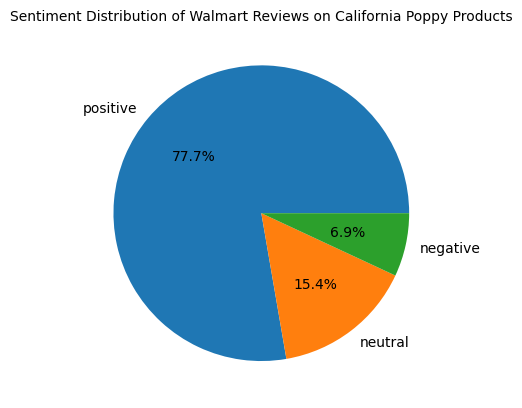

In [5]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

file.pred.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax,)
ax.set_ylabel('')
ax.set_title('Sentiment Distribution of Walmart Reviews on California Poppy Products', size = 10)
fig.savefig('sentiment_distribution_Walmart_transformer.png', dpi = 300)

#### confusion matrix

In [ ]:
file.head()

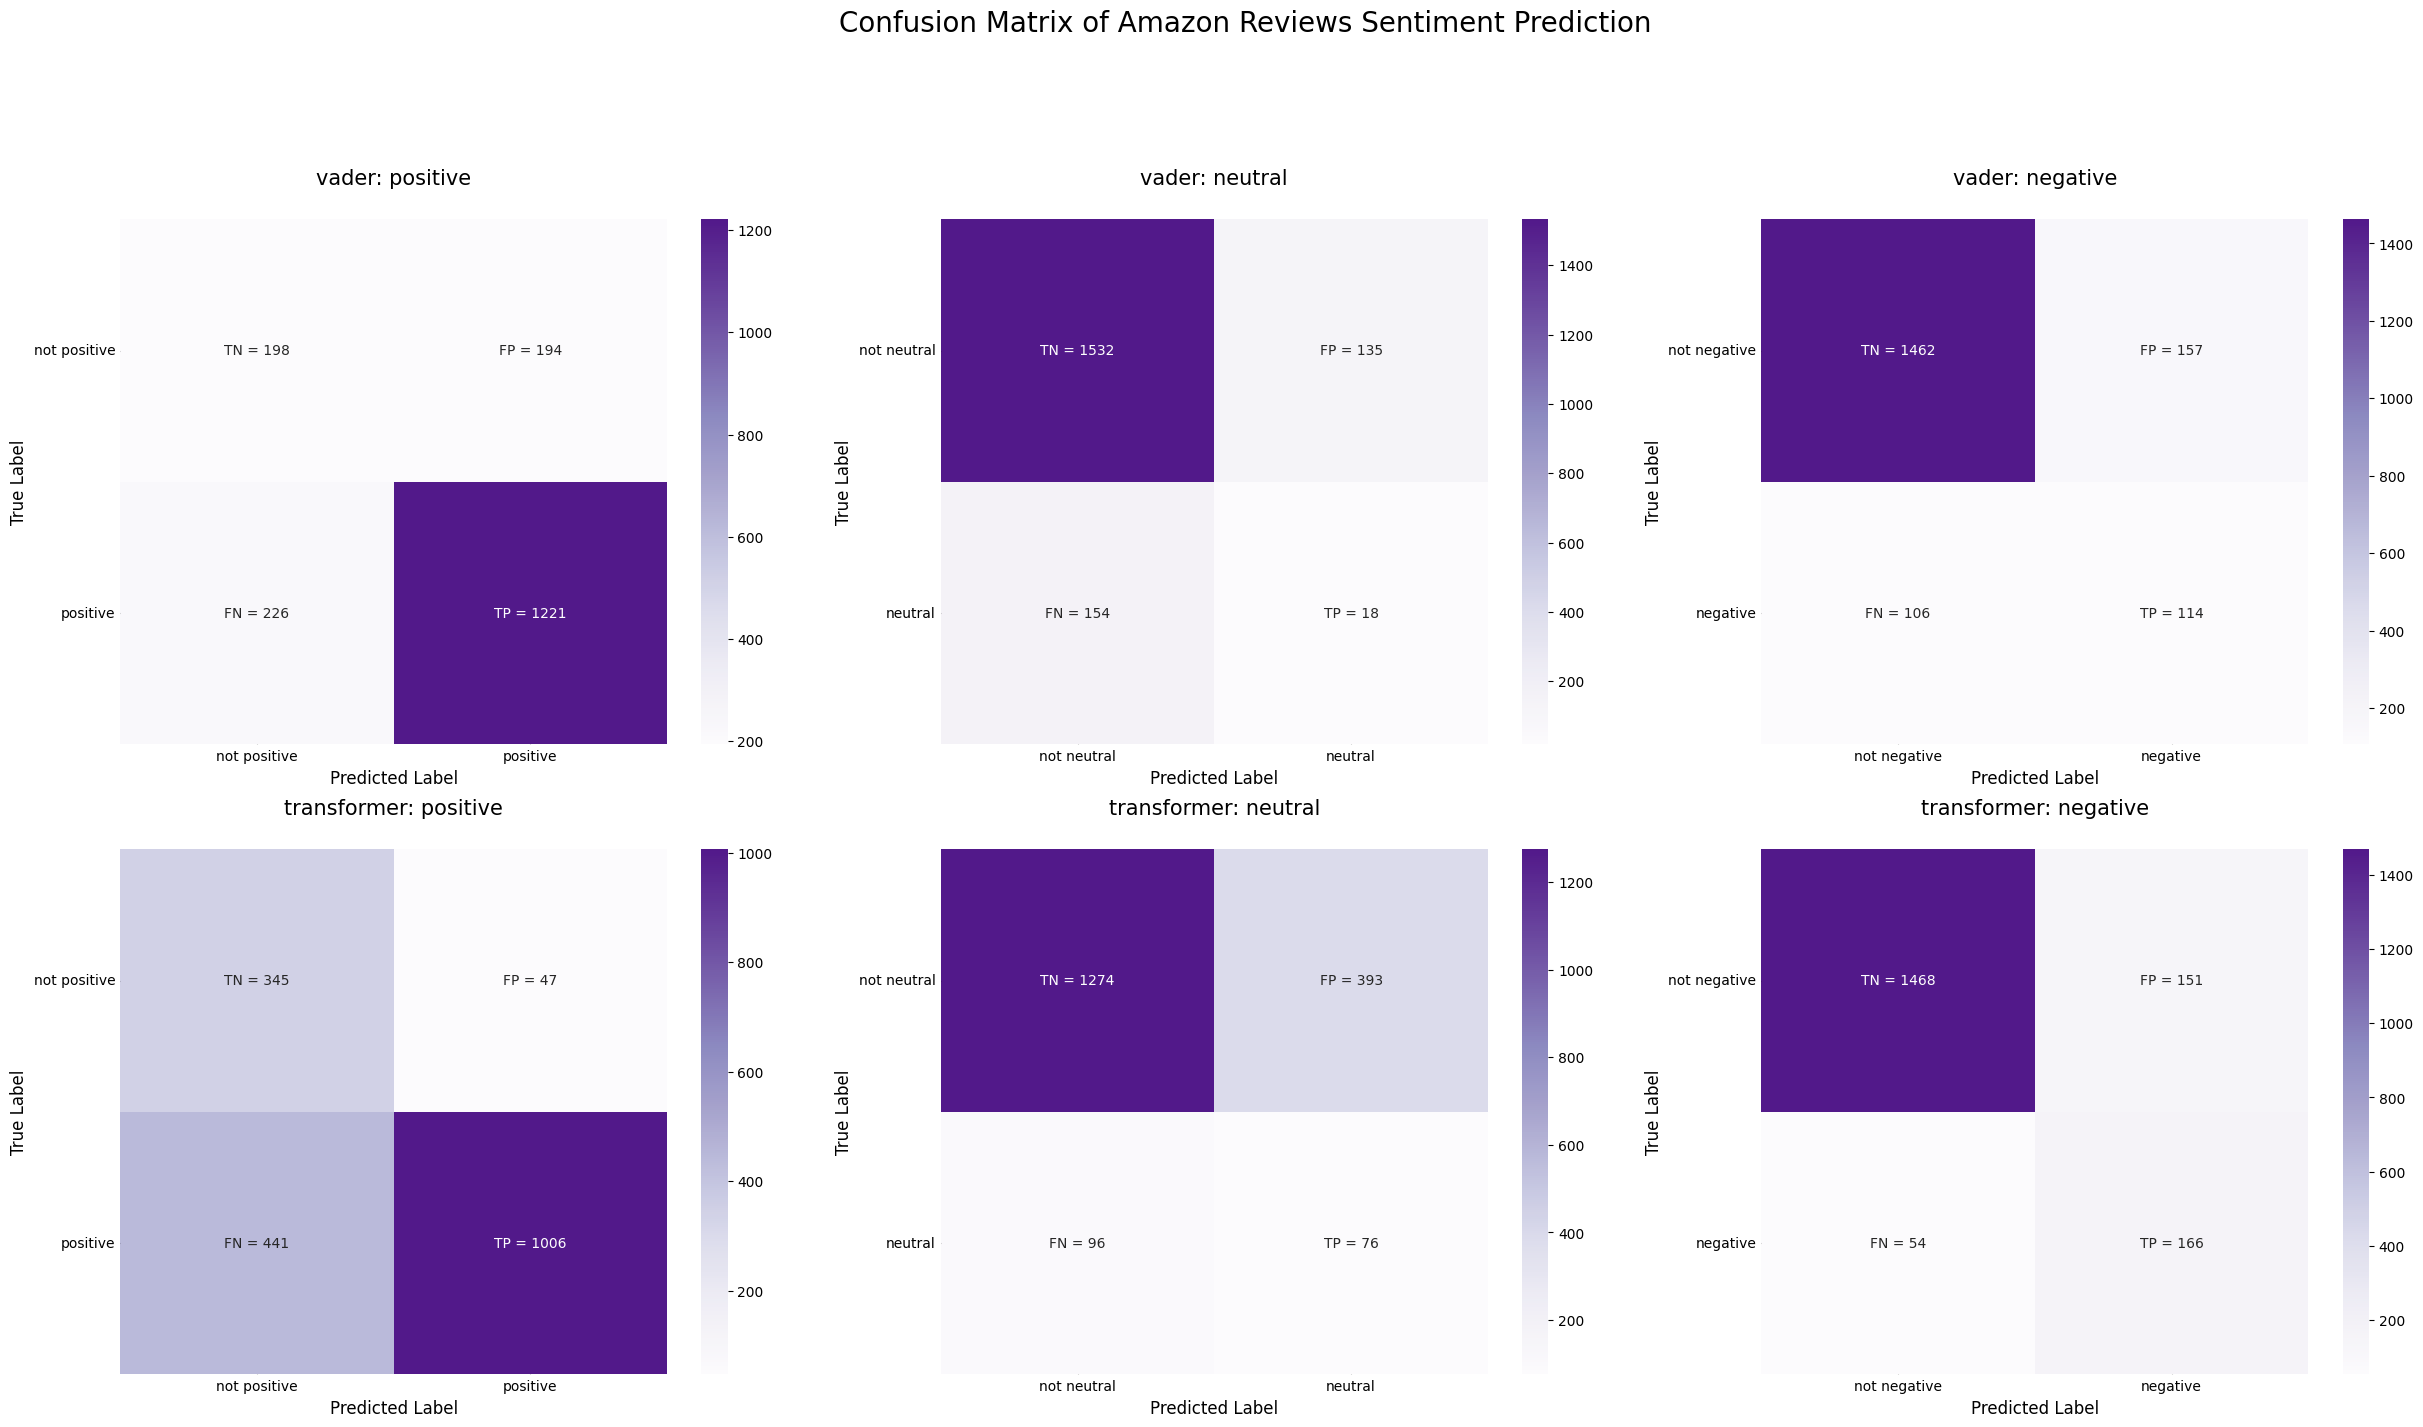

In [44]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

nrow, ncol = 2, 3
file['label'] = file.review_rating.apply(lambda x: float(x.split('(')[1].split(')')[0])) 
file['label'] = file.label.apply(lambda x: 'positive' if x >= 4 else 'negative' if x <= 2 else 'neutral')

fig, ax = plt.subplots(2, 3, figsize = (30, 15))
fig.suptitle('Confusion Matrix of Amazon Reviews Sentiment Prediction', fontsize = 20, y = 1.02)

for i in range(nrow):
    for j in range(ncol):
        cf_mat = confusion_matrix(file.label == ['positive', 'neutral', 'negative'][j], 
                                     file[['sentiment','pred'][i]] ==['positive', 'neutral', 'negative'][j])
        
        texts = [[f'TN = {cf_mat[0,0]}',f'FP = {cf_mat[0,1]}'], \
            [f'FN = {cf_mat[1,0]}', f'TP = {cf_mat[1,1]}']]       
        
        sns.heatmap(cf_mat, annot=texts, fmt = '',
                     cmap = 'Purples', alpha =0.9, ax = ax[i][j])

        ax[i][j].set_title(f'{["vader", "transformer"][i]}: {["positive", "neutral", "negative"][j]}', fontsize = 15,
                           y = 1.05)
        ax[i][j].set_xticklabels(labels = [f'{["not positive", "not neutral", "not negative"][j]}', 
                                           f'{["positive", "neutral", "negative"][j]}'])
        ax[i][j].tick_params(length = .1)
        ax[i][j].set_yticklabels(labels = [f'{["not positive", "not neutral", "not negative"][j]}', 
                                           f'{["positive", "neutral", "negative"][j]}'], rotation = 0)
        ax[i][j].set_xlabel('Predicted Label', fontsize = 12)
        ax[i][j].set_ylabel('True Label', fontsize =12)

fig.savefig('Amazon_sentiment_confusion_matrix.png', dpi = 300)


Accuracy: 0.7357
Precision: 0.7403
Recall: 0.7357
F1 Score: 0.7373


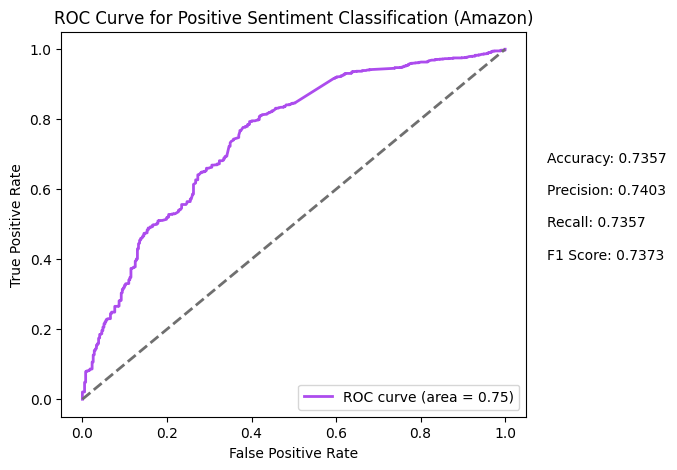

<Figure size 640x480 with 0 Axes>

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

accuracy = accuracy_score(file.label, file.sentiment)
precision = precision_score(file.label, file.sentiment, average='weighted')
recall = recall_score(file.label, file.sentiment, average='weighted')
f1 = f1_score(file.label, file.sentiment, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


labels = file.label.apply(lambda x: 1 if x == 'positive' else 0) 
compound = file.compound


fpr, tpr, thresholds = roc_curve(labels, compound)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (6, 5))
plt.plot(fpr, tpr, color='#8900e6', alpha = 0.7, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='#6f6f6f', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Positive Sentiment Classification (Amazon)')
plt.legend(loc="lower right")
plt.text(1.1, 0.4, f"Accuracy: {accuracy:.4f}\n\nPrecision: {precision:.4f}\n\nRecall: {recall:.4f}\n\nF1 Score: {f1:.4f}",)
plt.show()

plt.savefig('Amazon_sentiment_roc.png', dpi = 300)


### iherb

In [52]:
%cd ~/scrapfly-scrapers/iherb-scraper/results/
import pandas as pd

# files = []
# for kw in ['tea', 'tincture', 'supplement', 'drink']:
#     search = pd.read_json(f'search_{kw}_extra.json')
#     product = pd.read_json(f'search_{kw}_products_w_brand_extra.json')
#     review = pd.read_json(f'search_{kw}_reviews_extra.json')


#     search.url = search.apply(lambda x: x.url if x.url.startswith('https://www.iherb.com') else '/pr/'.join(x.review_url.split('/r/')), axis = 1)

#     file = review.merge(search, on = 'review_url').merge(product, on = 'url')
#     file.drop(columns = ['rating_value', 'review_count'], inplace = True)

#     column_order = [
#         'brand','name', 'price', 'sku', 'description', 'direction', 'ingredients', 'warnings', 
#         'disclaimer', 'info_table', 'url', 'avg_rating', 'total_reviews', 'review_url', 
#         'title', 'rating', 'text', 'location_and_date', 'verified', 'rewarded'
#     ]

#     file = file[column_order]
#     file.drop_duplicates(subset = ['text', 'location_and_date'],)
#     files += [file]


C:\Users\tianc\scrapfly-scrapers\iherb-scraper\results


In [ ]:
comb_file = pd.concat(files)
comb_file = comb_file.reset_index().drop(columns = 'index')
comb_file.to_csv('iherb_reviews_extra.csv', )
comb_file.to_excel('iherb_reviews_extra.xlsx', )


#### sent with vader

In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# file = comb_file.dropna().drop_duplicates(subset = ['name', 'title', 'text']).reset_index(drop = True)

analyzer = SentimentIntensityAnalyzer()
vs = [analyzer.polarity_scores(sentence) for sentence in file['text']]

file[list(vs[0].keys())] = [[v[k] for k in vs[0].keys()] for v in vs]
file['sentiment'] = file.compound.apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

file.to_csv('~/scrapfly-scrapers-large-file/iherb_reviews_w_sentiment.csv', mode='a', index=False, header=False)
file.to_excel('iherb_reviews_w_sentiment.xlsx', index = False)

In [99]:
file = pd.read_csv('~/scrapfly-scrapers-large-file/iherb_reviews_w_sentiment.csv')
file.head()
# file = file.drop_duplicates(subset = ['name', 'title','text']).reset_index(drop = True)
# file.to_csv('iherb_reviews_w_sentiment.csv', index = False)
# file.to_excel('iherb_reviews_w_sentiment.xlsx', index = False)

,brand,name,price,sku,description,direction,ingredients,warnings,disclaimer,info_table,...,rating,text,location_and_date,verified,rewarded,neg,neu,pos,compound,sentiment
0,California Gold Nutrition,"California Gold Nutrition, LactoBif® 5 Probiot...",$9.75,CGN-00963,"\r\nFeaturing 8 Active Probiotic Strains, Inc...","['Take 1 capsule daily, with or without food. ...","['Vegetable Capsule (Modified Cellulose), Micr...",['Keep out of reach of children. Consult with ...,['While iHerb strives to ensure the accuracy o...,{'nutrition_fact': [{'name': 'Probiotic Bacter...,...,5 star(s),I have heard so many good things about probio...,"May 6, 2024",True,True,0.000,0.540,0.460,0.9878,positive
1,California Gold Nutrition,"California Gold Nutrition, LactoBif® 5 Probiot...",$9.75,CGN-00963,"\r\nFeaturing 8 Active Probiotic Strains, Inc...","['Take 1 capsule daily, with or without food. ...","['Vegetable Capsule (Modified Cellulose), Micr...",['Keep out of reach of children. Consult with ...,['While iHerb strives to ensure the accuracy o...,{'nutrition_fact': [{'name': 'Probiotic Bacter...,...,5 star(s),I have suffered from horrible digestive issues...,"Feb 19, 2024",True,True,0.179,0.743,0.079,-0.7440,negative
2,California Gold Nutrition,"California Gold Nutrition, LactoBif® 5 Probiot...",$9.75,CGN-00963,"\r\nFeaturing 8 Active Probiotic Strains, Inc...","['Take 1 capsule daily, with or without food. ...","['Vegetable Capsule (Modified Cellulose), Micr...",['Keep out of reach of children. Consult with ...,['While iHerb strives to ensure the accuracy o...,{'nutrition_fact': [{'name': 'Probiotic Bacter...,...,5 star(s),They are awesome. I only ordered the 5billion ...,"Feb 9, 2024",True,True,0.000,0.703,0.297,0.9755,positive
3,California Gold Nutrition,"California Gold Nutrition, LactoBif® 5 Probiot...",$9.75,CGN-00963,"\r\nFeaturing 8 Active Probiotic Strains, Inc...","['Take 1 capsule daily, with or without food. ...","['Vegetable Capsule (Modified Cellulose), Micr...",['Keep out of reach of children. Consult with ...,['While iHerb strives to ensure the accuracy o...,{'nutrition_fact': [{'name': 'Probiotic Bacter...,...,5 star(s),California Gold Nutrition LactoBif® 5 Probioti...,"Nov 24, 2024",True,True,0.023,0.776,0.201,0.9432,positive
4,California Gold Nutrition,"California Gold Nutrition, LactoBif® 5 Probiot...",$9.75,CGN-00963,"\r\nFeaturing 8 Active Probiotic Strains, Inc...","['Take 1 capsule daily, with or without food. ...","['Vegetable Capsule (Modified Cellulose), Micr...",['Keep out of reach of children. Consult with ...,['While iHerb strives to ensure the accuracy o...,{'nutrition_fact': [{'name': 'Probiotic Bacter...,...,5 star(s),I noticed the improvements and the benefit in ...,"Nov 6, 2024",True,True,0.000,0.728,0.272,0.9565,positive


In [100]:
temp = file.groupby('name').agg({'brand':'first','total_reviews':'first', 'avg_rating':'first'}).reset_index()
temp['avg_rating'] = temp.avg_rating.apply(lambda x: float(x.rstrip(',')))
temp = temp.groupby('brand').agg({'total_reviews':'sum', 'avg_rating':'mean'}).sort_values('avg_rating', ascending = False).head(10).reset_index()
temp

,brand,total_reviews,avg_rating
0,Vital Nutrients,5,5.000000
1,NaturesPlus,35914,5.000000
2,Sambucol,23706,4.875000
3,Garden of Life,41256,4.833333
4,Doctor's Best,219661,4.791667
5,NutriBiotic,123684,4.785714
6,Apex,13287,4.750000
7,21st Century,10823,4.750000
8,Eclectic Herb,847,4.750000
9,Earthtone Foods,5915,4.750000


In [101]:
ratings = []
sent = []
for b in temp.brand:
    ct = file[file.brand == b].groupby('name').agg({'avg_rating': 'first'}).reset_index()['avg_rating'].value_counts().reset_index()
    ratings.append(ct.to_dict('records'))
    s = file[file.brand == b].sentiment.value_counts()/file[file.brand == b].shape[0]
    sent.append(s.reset_index().to_dict('records'))

temp['ratings'] = ratings
temp['sent_breakdown'] = sent

temp

,brand,total_reviews,avg_rating,ratings,sent_breakdown
0,Vital Nutrients,5,5.000000,"[{'avg_rating': '5,', 'count': 2}]","[{'sentiment': 'positive', 'count': 1.0}]"
1,NaturesPlus,35914,5.000000,"[{'avg_rating': '5,', 'count': 2}]","[{'sentiment': 'positive', 'count': 0.97297297..."
2,Sambucol,23706,4.875000,"[{'avg_rating': '5,', 'count': 1}, {'avg_ratin...","[{'sentiment': 'positive', 'count': 0.89655172..."
3,Garden of Life,41256,4.833333,"[{'avg_rating': '4.75,', 'count': 2}, {'avg_ra...","[{'sentiment': 'positive', 'count': 0.98245614..."
4,Doctor's Best,219661,4.791667,"[{'avg_rating': '4.75,', 'count': 3}, {'avg_ra...","[{'sentiment': 'positive', 'count': 0.96638655..."
5,NutriBiotic,123684,4.785714,"[{'avg_rating': '4.75,', 'count': 4}, {'avg_ra...","[{'sentiment': 'positive', 'count': 0.89928057..."
6,Apex,13287,4.750000,"[{'avg_rating': '4.75,', 'count': 1}]","[{'sentiment': 'positive', 'count': 1.0}]"
7,21st Century,10823,4.750000,"[{'avg_rating': '4.75,', 'count': 2}]","[{'sentiment': 'positive', 'count': 0.975}, {'..."
8,Eclectic Herb,847,4.750000,"[{'avg_rating': '4.75,', 'count': 2}]","[{'sentiment': 'positive', 'count': 0.825}, {'..."
9,Earthtone Foods,5915,4.750000,"[{'avg_rating': '4.75,', 'count': 1}]","[{'sentiment': 'positive', 'count': 0.95}, {'s..."


#### <font color = '#8900e9'> **match USLD** </font>

In [102]:
usld = pd.read_csv('~/scrapfly-scrapers/iherb-scraper/results/california_poppy_usld.csv')

for col in usld.columns:
    usld[col] = usld[col].apply(lambda x: x.strip("[]"))
    usld[col] = usld[col].apply(lambda x: x.replace("'", ""))

col = ['netContents', 'claims', 'allIngredients']
def strip_all(x):
    return x.strip(" {} ")

def str2dict(x):
    try:
        sub_entries = x.strip(' {} ').split('},')
        parsed_list = []
        for sub in sub_entries:
            sub_dict = {}
            for pair in sub.split(','):
                try:
                    key, value = map(strip_all, pair.split(':', 1))  # only split the first colon
                    sub_dict[key] = value
                except ValueError:
                    pass  
            parsed_list.append(sub_dict)
        return parsed_list
    except AttributeError:
        return []
    
for c in col:
    usld[c] = usld[c].apply(str2dict)

usld.to_csv('california_poppy_usld_cleaned.csv', index = False)

In [103]:
brands = usld[usld.offMarket == '0'].brandName.unique()
brands = '|'.join(brands)

file = file.dropna(subset = ['brand'])
file_v = file[file.brand.str.contains(brands)]
temp = file_v.groupby('name').agg({'brand':'first','total_reviews':'first', 'avg_rating':'first'}).reset_index()
temp['avg_rating'] = temp.avg_rating.apply(lambda x: float(x.rstrip(',')))
temp = temp.groupby('brand').agg({'total_reviews':'sum', 'avg_rating':'mean'}).sort_values('avg_rating', ascending = False).head(10).reset_index()
temp

,brand,total_reviews,avg_rating
0,Eclectic Herb,847,4.750000
1,California Gold Nutrition,2733482,4.710000
2,Gaia Herbs,651,4.700000
3,Crystal Star,47,4.500000
4,Bio Nutrition,48,4.500000
5,Herb Pharm,604,4.375000
6,Herbs Etc.,545,4.166667


In [105]:
ratings = []
sent = []
for b in temp.brand:
    ct = file[file.brand == b].groupby('name').agg({'avg_rating': 'first'}).reset_index()['avg_rating'].value_counts().reset_index()
    ratings.append(ct.to_dict('records'))
    s = file[file.brand == b].sentiment.value_counts()/file[file.brand == b].shape[0]
    sent.append(s.reset_index().to_dict('records'))

temp['ratings'] = ratings
temp['sent_breakdown'] = sent

for i in range(len(temp)):
    print(temp.brand[i])
    print(temp.ratings[i])
    print(temp.sent_breakdown[i])

Eclectic Herb
[{'avg_rating': '4.75,', 'count': 2}]
[{'sentiment': 'positive', 'count': 0.825}, {'sentiment': 'negative', 'count': 0.15}, {'sentiment': 'neutral', 'count': 0.025}]
California Gold Nutrition
[{'avg_rating': '4.75,', 'count': 38}, {'avg_rating': '4.5,', 'count': 10}, {'avg_rating': '5,', 'count': 2}]
[{'sentiment': 'positive', 'count': 0.9620390455531453}, {'sentiment': 'negative', 'count': 0.03036876355748373}, {'sentiment': 'neutral', 'count': 0.007592190889370932}]
Gaia Herbs
[{'avg_rating': '4.75,', 'count': 2}, {'avg_rating': '4.5,', 'count': 2}, {'avg_rating': '5,', 'count': 1}]
[{'sentiment': 'positive', 'count': 0.810126582278481}, {'sentiment': 'negative', 'count': 0.13924050632911392}, {'sentiment': 'neutral', 'count': 0.05063291139240506}]
Crystal Star
[{'avg_rating': '4.5,', 'count': 1}]
[{'sentiment': 'positive', 'count': 0.7}, {'sentiment': 'neutral', 'count': 0.3}]
Bio Nutrition
[{'avg_rating': '4.5,', 'count': 1}]
[{'sentiment': 'positive', 'count': 0.9}, 

In [17]:
brand = temp.head(10).brand.to_list()
for b in brand:
    print(b)
    display(usld[(usld.offMarket == '0') & (usld.brandName.apply(lambda x: x.strip() in b.strip()))].head(2))

Eclectic Herb


,_id,fullName,brandName,langualCode,langualCodeDescription,allIngredients,netContents,claims,offMarket
23,294667,California Poppy,Eclectic Herb,"E0165, A1306","Liquid, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'Fluid Ounce(s)', 'quantity': '2', '...","[{'langualCodeDescription': 'All Other', 'lang...",0
48,316752,California Poppy,Eclectic Herb,"E0165, A1306","Liquid, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'Fluid Ounce(s)', 'quantity': '2', '...","[{'langualCodeDescription': 'All Other', 'lang...",0


California Gold Nutrition


,_id,fullName,brandName,langualCode,langualCodeDescription,allIngredients,netContents,claims,offMarket
273,273321,CoQ10 100 mg with PQQ,California Gold Nutrition,"E0161, A1309","Softgel Capsule, Non-Nutrient/Non-Botanical","[{'ingredientGroup': 'Coenzyme Q-10', 'notes':...","[{'unit': 'Veggie Softgel(s)', 'quantity': '24...","[{'langualCodeDescription': 'All Other', 'lang...",0
277,273873,EpiCor Dried Yeast Fermentate 500 mg,California Gold Nutrition,"E0159, A1306","Capsule, Botanical",[{'ingredientGroup': 'Saccharomyces cerevisiae...,"[{'unit': 'Veggie Capsule(s)', 'quantity': '36...","[{'langualCodeDescription': 'All Other', 'lang...",0


Gaia Herbs


,_id,fullName,brandName,langualCode,langualCodeDescription,allIngredients,netContents,claims,offMarket
15,209724,Valerian Poppy Supreme,Gaia Herbs,"E0165, A1306","Liquid, Botanical",[{'ingredientGroup': 'Proprietary Blend (Herb/...,"[{'unit': 'fl. Oz.', 'quantity': '1', 'display...","[{'langualCodeDescription': 'All Other', 'lang...",0
33,209487,California Poppy,Gaia Herbs,"E0165, A1306","Liquid, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'fl. Oz.', 'quantity': '4', 'display...","[{'langualCodeDescription': 'All Other', 'lang...",0


Crystal Star


,_id,fullName,brandName,langualCode,langualCodeDescription,allIngredients,netContents,claims,offMarket
141,243868,Night Caps,Crystal Star,"E0159, A1325","Capsule, Other Combinations",[{'ingredientGroup': 'Proprietary Blend (Combi...,"[{'unit': 'Vegetarian Capsule(s)', 'quantity':...","[{'langualCodeDescription': 'All Other', 'lang...",0


Bio Nutrition


,_id,fullName,brandName,langualCode,langualCodeDescription,allIngredients,netContents,claims,offMarket
2,200561,California Poppy Seed,Bio Nutrition,"E0159, A1306","Capsule, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'Vegetarian Capsule(s)', 'quantity':...","[{'langualCodeDescription': 'All Other', 'lang...",0


Herb Pharm


,_id,fullName,brandName,langualCode,langualCodeDescription,allIngredients,netContents,claims,offMarket
3,203399,California Poppy,Herb Pharm,"E0165, A1306","Liquid, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'fl. Oz.', 'quantity': '4', 'display...","[{'langualCodeDescription': 'All Other', 'lang...",0
4,203940,California Poppy,Herb Pharm,"E0165, A1306","Liquid, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'fl. Oz.', 'quantity': '1', 'display...","[{'langualCodeDescription': 'All Other', 'lang...",0


Herbs Etc.


,_id,fullName,brandName,langualCode,langualCodeDescription,allIngredients,netContents,claims,offMarket
17,50195,California Poppy,Herbs Etc.,"E0165, A1306","Liquid, Botanical","[{'ingredientGroup': 'California Poppy', 'note...","[{'unit': 'Fluid Ounce(s)', 'quantity': '8', '...","[{'langualCodeDescription': 'No Claim', 'langu...",0
235,182444,Deep Sleep,Herbs Etc.,"E0161, A1306","Softgel Capsule, Botanical","[{'ingredientGroup': 'Header', 'notes': '', 'n...","[{'unit': 'Fast-Acting Softgel(s)', 'quantity'...","[{'langualCodeDescription': 'All Other', 'lang...",0


##### sent with vader

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
file = file.dropna(subset = 'review_text').drop_duplicates(subset= ['sku', 'review_title', 'review_text']).reset_index(drop = True)
analyzer = SentimentIntensityAnalyzer()
vs = [analyzer.polarity_scores(sentence) for sentence in file['review_text']]

file[list(vs[0].keys())] = [[v[k] for k in vs[0].keys()] for v in vs]
file['sentiment'] = file.compound.apply(lambda x: 'positive' if x >= 0.05 else ('negative' if x <= -0.05 else 'neutral'))

file.to_csv('Walmart_reviews_w_sentiment.csv', mode='a', index=False, header=True)
file.to_excel('Walmart_reviews_w_sentiment.xlsx', index = False)

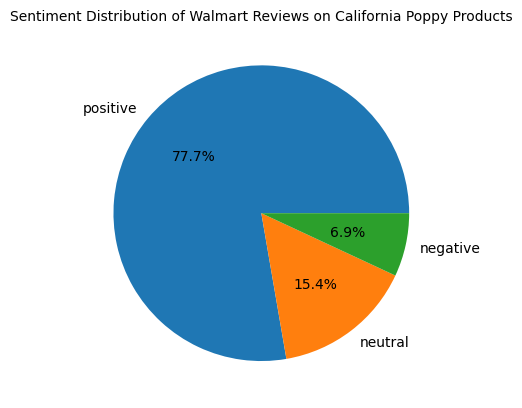

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

file.pred.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax,)
ax.set_ylabel('')
ax.set_title('Sentiment Distribution of Walmart Reviews on California Poppy Products', size = 10)
fig.savefig('sentiment_distribution_Walmart_transformer.png', dpi = 300)

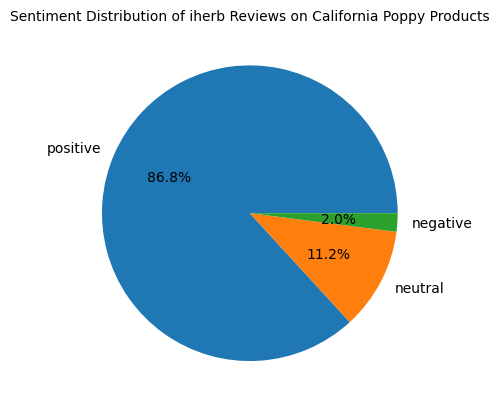

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

file.pred.value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax,)
ax.set_ylabel('')
ax.set_title('Sentiment Distribution of iherb Reviews on California Poppy Products', size = 10)
fig.savefig('sentiment_distribution_iherb_transformer.png', dpi = 300)

#### sent w/ Transformer

In [ ]:
from transformers import AutoTokenizer
from transformers import RobertaTokenizer
from transformers import AutoModelForSequenceClassification
from datasets import Dataset, load_dataset
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from tqdm import tqdm
import evaluate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import text_cleaning
import random
import pandas as pd
from collections import Counter
import pickle
import joblib
import csv
import json
from copy import deepcopy
import warnings
import sklearn.exceptions
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=sklearn.exceptions.UndefinedMetricWarning)

violet = '#702b9d'
RANDOM_SEED = 3001
batch_size = 8
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

def tokenize_function(examples):
    tok = tokenizer(examples["review_text"], padding='max_length', truncation=True,
                    max_length = 512,
                    return_tensors="pt")
    examples['text_encoded'] = tok['input_ids']
    return examples

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# preprocess, tokenize, loader
Walmart_reviews = Dataset.from_csv('Walmart_reviews_w_sentiment.csv')

Walmart_reviews_ = Walmart_reviews.map(lambda x: text_cleaning.text_cleaning(x, map_label = False))
Walmart_reviews_ = Walmart_reviews_.map(tokenize_function, batched = True, load_from_cache_file = False)
Walmart_reviews_.set_format('torch')

def do_infer(infer_data, output_dir):

    model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
    model.to(device)
    model.eval()

    headers = list(Walmart_reviews_.features)[:-1] + ['pred']

    output_file = output_dir + '/preds.csv'
    with torch.no_grad():
        with open(output_file, mode='a', newline='', encoding='utf-8') as file:
                writer = csv.writer(file)
                writer.writerow(headers)
                for i in tqdm(range(0, len(infer_data), batch_size)):
                    batch = infer_data[i:i + batch_size]
                    input = torch.tensor(batch["text_encoded"]).to(device)

                    outputs = model(input)
                    logits = outputs.logits
                    predictions = torch.argmax(logits, dim=-1)

                    for j in range(predictions.shape[0]):
                        row = [batch[h][j] for h in headers[:-1]] + [['negative', 'neutral', 'positive'][predictions[j].item()]]
                        writer.writerow(row)
    print('inference completed ...')
    return

do_infer(Walmart_reviews_, os.getcwd())

### Glassdoor

In [1]:
%cd ~/scrapfly-scrapers/glassdoor-scraper/results/
import csv 
import json
import os 

def _write_to_csv(csv_file, files):
    headers = ['summary', 'pros', 'cons', 'review_date', 'job_title', 'rating_overall', 'rating_work_life_balance',
                   'rating_compensation_and_benefits', 'rating_career_opportunities', 'rating_culture_and_values',
                   'rating_diversity_and_inclusion', 'rating_senior_leadership', 'rating_recommend_to_friend',
                   'rating_business_outlook', 'overall_rating', 'compensation_and_benefits_rating','culture_and_values_rating',
                   'diversity_and_inclusion_rating']
    for f in files:
        with open(f, 'r', encoding='utf-8') as file:
            ff = json.load(file)
            reviews = ff['reviews']
            ratings = ff['ratings']
        with open(csv_file, mode='a', newline='', encoding='utf-8') as file:
            writer = csv.writer(file)
                
            # Write headers only if the file is empty
            if not os.path.exists(csv_file) or os.stat(csv_file).st_size == 0:
                writer.writerow(headers)
            for review in reviews:
                # Flatten review data
                flattened_review = {
                        "summary": review.get("summary"),
                        "pros": review.get("pros"),
                        "cons": review.get("cons"),
                        "review_date": review.get("reviewDateTime"),
                        "job_title": review.get("jobTitle", {}).get("text") if review.get("jobTitle") else None,    
                        "rating_overall": review.get("ratingOverall"),
                        "rating_work_life_balance": review.get("ratingWorkLifeBalance"),
                        "rating_compensation_and_benefits": review.get("ratingCompensationAndBenefits"),
                        "rating_career_opportunities": review.get("ratingCareerOpportunities"),
                        "rating_culture_and_values": review.get("ratingCultureAndValues"),
                        "rating_diversity_and_inclusion": review.get("ratingDiversityAndInclusion"),
                        "rating_senior_leadership": review.get("ratingSeniorLeadership"),
                        "rating_recommend_to_friend": review.get("ratingRecommendToFriend"),
                        "rating_business_outlook": review.get("ratingBusinessOutlook"),
                    }

            # Add overall ratings to each row
                flattened_review.update({
                        "overall_rating": ratings.get("overallRating"),
                        "compensation_and_benefits_rating": ratings.get("compensationAndBenefitsRating"),
                        "culture_and_values_rating": ratings.get("cultureAndValuesRating"),
                        "diversity_and_inclusion_rating": ratings.get("diversityAndInclusionRating"),})
                writer.writerow([flattened_review[h] for h in headers])

    print(f'Data has been successfully written to {csv_file}')

C:\Users\tianc\scrapfly-scrapers\glassdoor-scraper\results


In [2]:
result = !ls -t | head -1
result

['Puzzle-Financial-Reviews-E5600492.json']

In [5]:
import pandas as pd
output = result[0].split('.json')[0]
_write_to_csv(f'{output}.csv', result)
file = pd.read_csv(f'{output}.csv', index_col=None)


Data has been successfully written to Puzzle-Financial-Reviews-E5600492.csv


In [6]:
file.dropna(subset=['job_title'], inplace=True)
file.to_json(f'{output}.json', orient = 'columns')